In [1]:

import velocity_metrics.utils.constant as const 
import velocity_metrics.eulerian.eulerian_drifters as eulerian  
import datetime
import sys   
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
import cartopy 
import warnings 
warnings.filterwarnings("ignore") 
sys.path.append('/Odyssey/private/t22picar/2024_DC_WOC-ESA/')
from src import utils
import velocity_metrics.utils.constant as const 
import velocity_metrics.eulerian.eulerian_drifters as eulerian  
import datetime
import sys   
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
import cartopy 
import warnings 
warnings.filterwarnings("ignore") 
sys.path.append('/Odyssey/private/t22picar/2024_DC_WOC-ESA/')
from src import utils

dir_eulerian = '/Odyssey/private/t22picar/2024_DC_WOC-ESA/dc_product_evaluation/DC_product_evaluation/eulerian_rms/'
base_outputdir = "../"

def plot_rmse_score_15m(list_xp_name,keys=None):

    print("depth = 15m")

    list_dict = [
             {'type_stat':'Mean','path':dir_eulerian+'eulerian_rms_Mediterranean_neurost_15/Eulerian_RMS_neurost.pyo','name':'NeurOST'}]

    for xp_name in list_xp_name:
        outputdir = f'{base_outputdir}/rec/{xp_name}/metric/Mediterranean/'
        list_dict = list_dict+[{'type_stat':'Mean','path':outputdir+f'/Eulerian_RMS_{xp_name}.pyo','name':f'{xp_name}'}] 

    print("Mediterranean result")
    if keys:
        display(utils.DictTable(list_dict,keys=keys))
    else:
        display(utils.DictTable(list_dict))

In [2]:
listkey_comp = ('Eastward Correlation', 'Northward Correlation','Norm Correlation', 
           'Eastward Explained Variance (%)', 'Northward Explained Variance (%)','Norm Explained Variance (%)',
           'Number of Points')

In [3]:
xp_name= ["unet_uv_drifters_aoml_15m_10y_11d_finescale_med_mae_res","unet_uv_drifters_aoml_15m_10y_11d_finescale_med_mae",'unet_uv_drifters_aoml_15m_10y_11d_finescale_med_log',"duacs_geos_15m"]
plot_rmse_score_15m(xp_name,keys=listkey_comp)


depth = 15m
Mediterranean result


Mean,Eastward Correlation,Eastward Explained Variance (%),Northward Correlation,Northward Explained Variance (%),Norm Correlation,Norm Explained Variance (%),Number of Points
NeurOST,0.595,42.369,0.625,36.793,0.505,33.938,51823.000
unet_uv_drifters_aoml_15m_10y_11d_finescale_med_mae_res,0.631,44.601,0.582,43.230,0.498,37.800,51823.000
unet_uv_drifters_aoml_15m_10y_11d_finescale_med_mae,0.606,39.183,0.572,35.517,0.486,31.832,51823.000
unet_uv_drifters_aoml_15m_10y_11d_finescale_med_log,0.624,40.258,0.569,37.246,0.487,33.913,51823.000
duacs_geos_15m,0.649,31.630,0.626,31.548,0.506,25.220,51823.000


In [4]:
WORKDIR = '/Odyssey/private/t22picar/2024_DC_WOC-ESA/dc_product_evaluation/DC_product_evaluation/'
import os
from matplotlib import pyplot
from typing import Tuple, Optional
import velocity_metrics.eulerian.eulerian_drifters as eulerian_drifters
import cartopy

def compare_map(var,ref,to_eval):

        proj = cartopy.crs.PlateCarree()

        dic_p = {'RMSD': {'vmin': 0.1, 'vmax': 0.4, 'cmap': 'YlGnBu_r'},
                'STD': {'vmin': 0.1, 'vmax': 0.4, 'cmap': 'YlGnBu'},
                'Correlation': {'vmin': 0.6, 'vmax':1, 'cmap': 'YlGnBu'},
                'Explained Variance (%)': {'vmin': 50, 'vmax': 85, 'cmap': 'YlGnBu'},
                'Quadratic Error (%)': {'vmin': 30, 'vmax': 65, 'cmap': 'YlGnBu_r'}
                }
        dic_diff = {'RMSD': {'vmin': -0.1, 'vmax': 0.1, 'cmap': 'RdBu_r'},
                'STD': {'vmin': -0.1, 'vmax': -0., 'cmap': 'YlGnBu'},
                'Correlation': {'vmin': -0.15, 'vmax':0.15, 'cmap': 'RdBu'},
                'Explained Variance (%)': {'vmin': -20, 'vmax': 20, 'cmap':'RdBu'},
                'Quadratic Error (%)': {'vmin': -20, 'vmax': 20, 'cmap': 'RdBu_r'}
                }
        ind = 0

        print(f'Diagnostic {var}')
        #print(listdir)
        dic_p = dic_diff
        #ref = listdir[2]
        print(f"ref : {os.path.splitext(os.path.basename(ref))[0]}")
        print(f"to eval : {os.path.splitext(os.path.basename(to_eval))[0]}")
        #print(f'{os.path.splitext(os.path.basename(ref))[0].split('_')[2:]} vs {os.path.splitext(os.path.basename(file))[0].split('_')[2:]}')

        title_ref = os.path.splitext(os.path.basename(ref))[0]
        title_ref = title_ref.split('_')
        title_ref = '_'.join(title_ref[2:])

        title_eval = os.path.splitext(os.path.basename(to_eval))[0]
        title_eval = title_eval.split('_')
        title_eval = '_'.join(title_eval[2:])

        #for file in to_eval:
        bn =  os.path.dirname(to_eval)
        title = os.path.splitext(os.path.basename(to_eval))[0]
        title_list = title.split('_')
        title = '_'.join(title_list[2:])
        fig = eulerian_drifters.plot_bin_diff(to_eval, ref, bn, var,
                                        box=None, #[-5, 11, 35, 43],
                                        vmin=dic_p[var]['vmin'],
                                        vmax=dic_p[var]['vmax'],
                                        cmap=dic_p[var]['cmap'],
                                        proj=proj)
        fig.suptitle(f'{var} {title_ref} (ref) vs {title_eval}') 


Diagnostic Correlation
ref : Eulerian_BINNED_008_047
to eval : Eulerian_BINNED_unet_uv_drifters_aoml_15m_10y_11d_finescale_med_mae_res


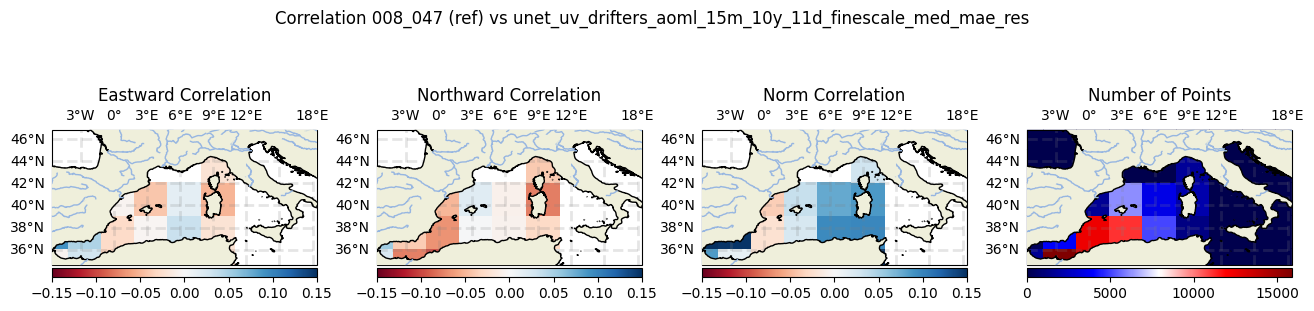

In [9]:
import utils_nb
# Comparer 4-2 ; 0-3
list_region=['Mediterranean']

for region in list_region:
     #region = 'Mediterranean'
     depth = '15'
     idir = os.path.join(WORKDIR, 'eulerian_rms')
     listdir = utils_nb.make_list_eulerian(idir, region, depth)
     listvar = ('RMSD',  'Correlation', 'Explained Variance (%)', 'Quadratic Error (%)')
     var = 'Correlation'

     #for listdir_item in listdir:
     #     print(os.path.splitext(os.path.basename(listdir_item))[0])
     ref = listdir[0]

     base_output="../rec"
     xp_name="unet_uv_drifters_aoml_15m_10y_11d_finescale_med_mae_res"
     if region=='T1':
          region='Agulhas'
          to_eval = f"{base_output}/{xp_name}/metric/{region}/Eulerian_BINNED_{xp_name}.pyo"
     else:
          to_eval = f"{base_output}/{xp_name}/metric/{region}/Eulerian_BINNED_{xp_name}.pyo"

     compare_map(var,ref,to_eval)